In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Suicidesindia2001-2012.csv')
data

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [3]:
D = data.groupby('Year').Total.sum()
D

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

In [4]:
x = D.index.values
y = D.values
x


array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

In [5]:
x = D.index.values.reshape(-1,1)
x

array([[2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [6]:
y

array([ 976464,  993648,  997622, 1023137, 1025201, 1062991, 1103667,
       1125082, 1144033, 1211322, 1219499, 1189068], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [9]:
reg.coef_

array([25268.46296296])

In [10]:
reg.intercept_

-49604781.370370366

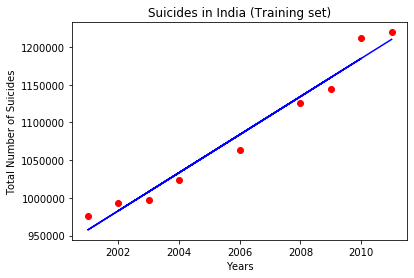

In [11]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title("Suicides in India (Training set)")
plt.xlabel("Years")
plt.ylabel("Total Number of Suicides")
plt.show()

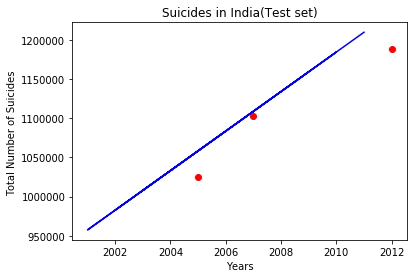

In [12]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title("Suicides in India(Test set)")
plt.xlabel("Years")
plt.ylabel("Total Number of Suicides ")
plt.show()

In [13]:
Yp = reg.predict(X_test)
Yp

array([1109023.7962963 , 1235366.11111112, 1058486.87037037])

In [16]:
np.set_printoptions(precision=2)
print(np.concatenate((Yp.reshape(len(Yp),1), y_test.reshape(len(y_test),1)),1))

[[1109023.8  1103667.  ]
 [1235366.11 1189068.  ]
 [1058486.87 1025201.  ]]


In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,Yp)

0.7558353708155057

In [17]:
reg.predict([[2020]])

array([1437513.81])